# Importing Dataset

In [5]:
# Insert Kaggle username and key 
import os
os.environ['KAGGLE_USERNAME'] = 'gabrielong' # username
os.environ['KAGGLE_KEY'] = "4967ce4719dde94b48812ee81d1311de" # key

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip

# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [10]:
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

In [11]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
fake_news['fake'] = 1
real_news['fake'] = 0
news = pd.concat([fake_news, real_news])

In [14]:
news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [15]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
news.describe()

,fake
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [17]:
#Check for missing data
news.isna().value_counts()

title  text   subject  date   fake 
False  False  False    False  False    44898
dtype: int64

In [18]:
#Check for duplicates
news['all_text'] = news['title'] + ' ' + news['text']
len(news['all_text'].unique())

39105

In [19]:
len(news['title'].unique())

38729

In [20]:
#Number of duplicates
len(news) - len(news['all_text'].unique())

5793

In [21]:
news.drop_duplicates(subset=['all_text'], inplace = True)
news.shape

(39105, 6)

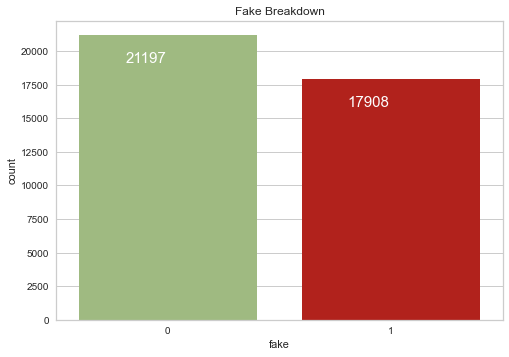

In [22]:
ax = sns.countplot(x='fake', data=news, palette=['g','r'])
ax.set_title('Fake Breakdown')
for i in ax.patches:
    ax.annotate(f'\n{i.get_height()}', (i.get_x() + 0.3, i.get_height()), ha='center', va='top', color='white', size=15)

After removing duplicates, we now have 21197 real news and 17908 fake news articles to work with.

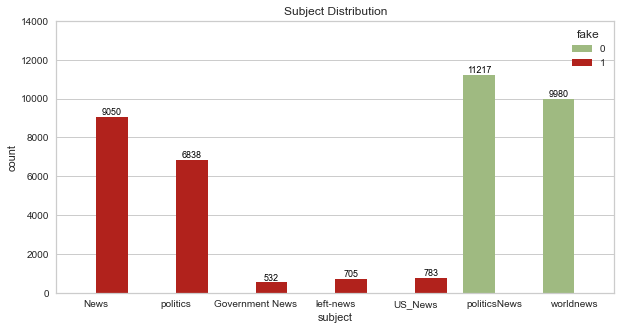

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='subject', data=news, hue='fake', palette=['g','r'])
ax.set_title('Subject Distribution')
ax.set(ylim=(0, 14000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height().astype(int)}', (p.get_x()+0.2, p.get_height() + 1000), ha='center', va='top', color='black', size=9)


<AxesSubplot:xlabel='length', ylabel='Count'>

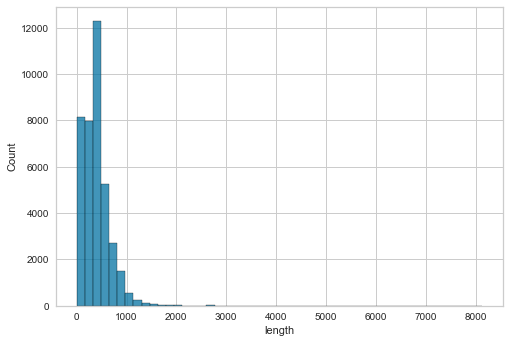

In [24]:
#Overall word length distribution
news['length'] = [len(x.split()) for x in news['text']]
sns.histplot(x='length', data=news, bins = 50)

<AxesSubplot:xlabel='length', ylabel='Count'>

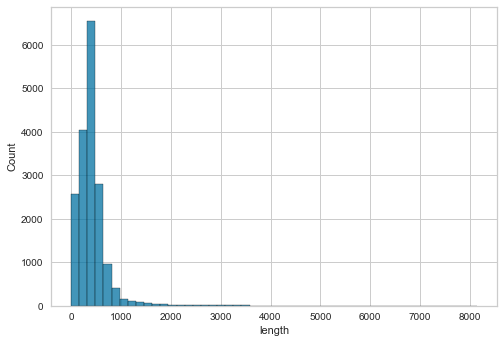

In [25]:
#Fake data distribution of word length
sns.histplot(x='length', data=news.loc[news['fake'] == 1], bins = 50)

<AxesSubplot:xlabel='length', ylabel='Count'>

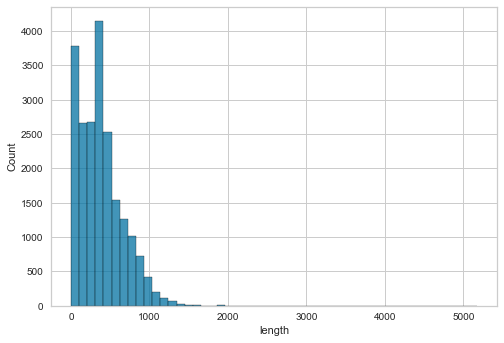

In [26]:
sns.histplot(x='length', data=news.loc[news['fake'] == 0], bins = 50)

In [27]:
from wordcloud import WordCloud, STOPWORDS
#Word Cloud
stopwords = set(STOPWORDS)
def give_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=0
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

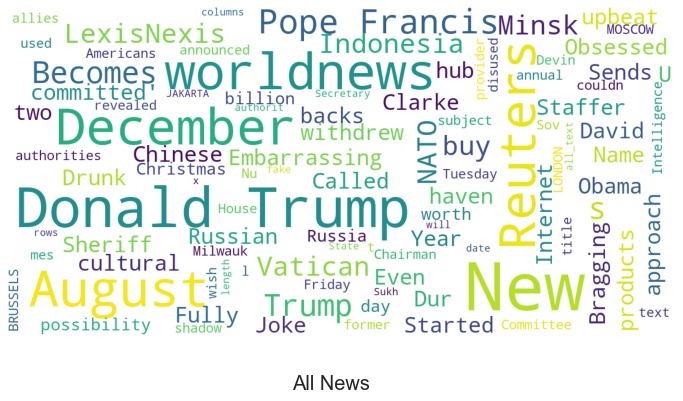

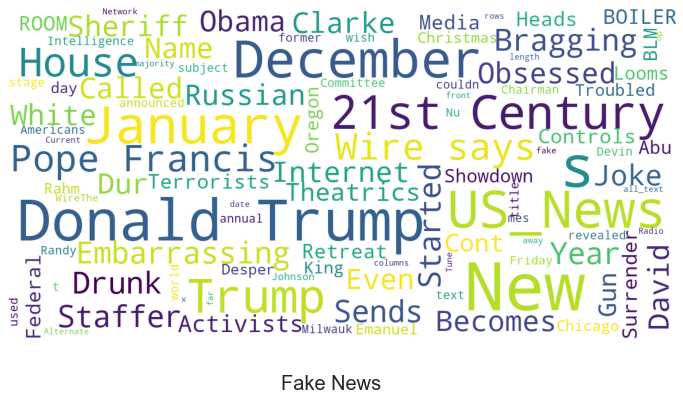

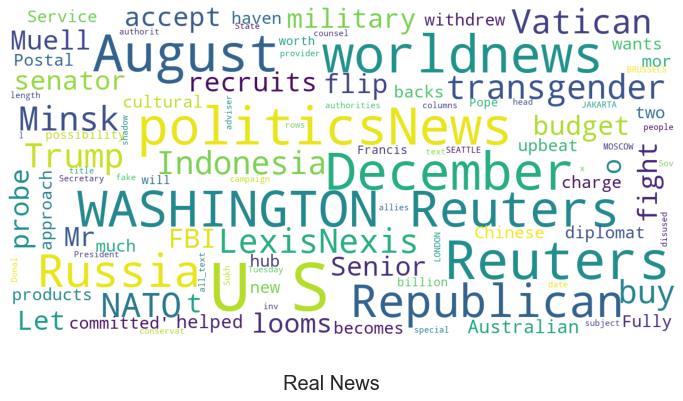

In [28]:
give_wordcloud(news,'All News')
give_wordcloud(news[news['fake'] == 1], 'Fake News')
give_wordcloud(news[news['fake'] == 0], 'Real News')

Fake news shows emotive and loaded language such as 'Drunk' and 'Obsessed', and biased persons such as Donald Trump are often mentioned.
Real news shows distinguished establishments such as 'NATO'and 'Reuters', and does not contain any emotive language. Instead, the words lean more towards factual.

# Data Preparation

In [29]:
news.head()

,title,text,subject,date,fake,all_text,length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...,495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...,305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...,444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...,420


In [30]:
# news.drop(labels=['title','text'],axis=1,inplace=True)
# news.head()

In [31]:
news.shape

(39105, 7)

In [32]:
fake_news['title']

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: title, Length: 23481, dtype: object

In [33]:
real_news['title']

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorities
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: title, Length: 21417, dtype: object

In [34]:
df = news.copy()

In [36]:
import string
import re
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Functions
def count_chars(text):
    return len(text)
def count_words(text):
    return len(text.split())
def count_capital_words(text):
    return sum(map(str.isupper,text.split()))
def count_sent(text):
    return len(nltk.sent_tokenize(text))
def count_punctuations(text):
    punctuations=string.punctuation
    d=dict()
    for i in punctuations:
        d[str(i)+' count']=text.count(i)
    return d 
def count_all_punctuations(text):
    count = 0
    punctuations=string.punctuation
    for i in punctuations:
        count += 1
    return count
def count_words_in_quotes(text):
    x = re.findall(f"{string.punctuation[1]}.{string.punctuation[1]}|{string.punctuation[6]}.{string.punctuation[6]}", text)
    count=0
    if x is None:
        return 0
    else:
        for i in x:
            t=i[1:-1]
            count+=count_words(t)
        return count
def count_unique_words(text):
    return len(set(text.split()))
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

In [37]:
df['char_count'] = df["all_text"].apply(lambda x:count_chars(x))
df['word_count'] = df["all_text"].apply(lambda x:count_words(x))
df['sent_count'] = df["all_text"].apply(lambda x:count_sent(x))
df['capital_word_count'] = df["all_text"].apply(lambda x:count_capital_words(x))
df['quoted_word_count'] = df["all_text"].apply(lambda x:count_words_in_quotes(x))
df['stopword_count'] = df["all_text"].apply(lambda x:count_stopwords(x))
df['unique_word_count'] = df["all_text"].apply(lambda x:count_unique_words(x))
df['punct_count'] = df["all_text"].apply(lambda x:count_all_punctuations(x))
df['avg_wordlength'] = df['char_count']/df['word_count']
df['avg_sentlength'] = df['word_count']/df['sent_count']
df['unique_vs_words'] = df['unique_word_count']/df['word_count']
df['stopwords_vs_words'] = df['stopword_count']/df['word_count']

In [38]:
def NounCounter(x):
    nouns = []
    for (word, pos) in x:
        if pos.startswith("NN"):
            nouns.append(word)
    return nouns


In [39]:
lowercased = [t.lower() for t in df['all_text']]

In [40]:
tokens = [nltk.word_tokenize(i) for i in lowercased]

In [41]:
tags = [nltk.pos_tag(i) for i in tokens]

In [42]:
from collections import Counter
counts = [Counter(tag for word, tag in i) for i in tags]

In [43]:
#NN is noun, RB is adverb
nouns_count = [i['NN'] for i in counts]
adverb_count = [i['RB'] for i in counts]

In [44]:
df['noun_count'] = nouns_count
df['adverb_count'] = adverb_count

In [45]:
df.head()

,title,text,subject,date,fake,all_text,length,char_count,word_count,sent_count,...,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,noun_count,adverb_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...,495,2973,507,28,...,0,195,282,32,5.863905,18.107143,0.556213,0.384615,116,36
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...,305,1968,313,11,...,0,120,209,32,6.287540,28.454545,0.667732,0.383387,94,10
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...,580,3688,595,25,...,0,220,344,32,6.198319,23.800000,0.578151,0.369748,167,20
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...,444,2853,458,15,...,0,164,278,32,6.229258,30.533333,0.606987,0.358079,143,24
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...,420,2417,431,19,...,0,197,244,32,5.607889,22.684211,0.566125,0.457077,79,16


In [46]:
df.head()

,title,text,subject,date,fake,all_text,length,char_count,word_count,sent_count,...,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,noun_count,adverb_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...,495,2973,507,28,...,0,195,282,32,5.863905,18.107143,0.556213,0.384615,116,36
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...,305,1968,313,11,...,0,120,209,32,6.287540,28.454545,0.667732,0.383387,94,10
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...,580,3688,595,25,...,0,220,344,32,6.198319,23.800000,0.578151,0.369748,167,20
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...,444,2853,458,15,...,0,164,278,32,6.229258,30.533333,0.606987,0.358079,143,24
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...,420,2417,431,19,...,0,197,244,32,5.607889,22.684211,0.566125,0.457077,79,16


In [47]:
df.iloc[:,6:]

,length,char_count,word_count,sent_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,noun_count,adverb_count
0,495,2973,507,28,5,0,195,282,32,5.863905,18.107143,0.556213,0.384615,116,36
1,305,1968,313,11,3,0,120,209,32,6.287540,28.454545,0.667732,0.383387,94,10
2,580,3688,595,25,42,0,220,344,32,6.198319,23.800000,0.578151,0.369748,167,20
3,444,2853,458,15,6,0,164,278,32,6.229258,30.533333,0.606987,0.358079,143,24
4,420,2417,431,19,0,0,197,244,32,5.607889,22.684211,0.566125,0.457077,79,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,466,2883,475,15,17,0,183,272,32,6.069474,31.666667,0.572632,0.385263,100,18
21413,125,853,132,6,1,0,46,84,32,6.462121,22.000000,0.636364,0.348485,37,1
21414,320,2000,327,16,5,0,133,221,32,6.116208,20.437500,0.675841,0.406728,74,15
21415,205,1261,214,8,1,0,83,145,32,5.892523,26.750000,0.677570,0.387850,54,8


In [48]:
df2 = df[['title','subject']]
df2.head()

,title,subject
0,Donald Trump Sends Out Embarrassing New Year’...,News
1,Drunk Bragging Trump Staffer Started Russian ...,News
2,Sheriff David Clarke Becomes An Internet Joke...,News
3,Trump Is So Obsessed He Even Has Obama’s Name...,News
4,Pope Francis Just Called Out Donald Trump Dur...,News


In [49]:
df2['char_count'] = df2["title"].apply(lambda x:count_chars(x))
df2['word_count'] = df2["title"].apply(lambda x:count_words(x))
df2['sent_count'] = df2["title"].apply(lambda x:count_sent(x))
df2['capital_word_count'] = df2["title"].apply(lambda x:count_capital_words(x))
df2['quoted_word_count'] = df2["title"].apply(lambda x:count_words_in_quotes(x))
df2['stopword_count'] = df2["title"].apply(lambda x:count_stopwords(x))
df2['unique_word_count'] = df2["title"].apply(lambda x:count_unique_words(x))
df2['punct_count'] = df2["title"].apply(lambda x:count_all_punctuations(x))
df2['avg_wordlength'] = df2['char_count']/df2['word_count']
df2['avg_sentlength'] = df2['word_count']/df2['sent_count']
df2['unique_vs_words'] = df2['unique_word_count']/df2['word_count']
df2['stopwords_vs_words'] = df2['stopword_count']/df2['word_count']
df2.head()

<ipython-input-49-6e0bc9f9fc3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['char_count'] = df2["title"].apply(lambda x:count_chars(x))
<ipython-input-49-6e0bc9f9fc3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_count'] = df2["title"].apply(lambda x:count_words(x))
<ipython-input-49-6e0bc9f9fc3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,title,subject,char_count,word_count,sent_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
0,Donald Trump Sends Out Embarrassing New Year’...,News,79,12,1,0,0,2,12,32,6.583333,12.0,1.0,0.166667
1,Drunk Bragging Trump Staffer Started Russian ...,News,69,8,1,0,0,0,8,32,8.625000,8.0,1.0,0.000000
2,Sheriff David Clarke Becomes An Internet Joke...,News,90,15,1,0,0,0,15,32,6.000000,15.0,1.0,0.000000
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,78,14,1,1,0,1,14,32,5.571429,14.0,1.0,0.071429
4,Pope Francis Just Called Out Donald Trump Dur...,News,70,11,1,0,0,0,11,32,6.363636,11.0,1.0,0.000000


In [50]:
from collections import Counter
lowercased2 = [t.lower() for t in df2['title']]
tokens2 = [nltk.word_tokenize(i) for i in lowercased2]
tags2 = [nltk.pos_tag(i) for i in tokens2]
counts2 = [Counter(tag for word, tag in i) for i in tags2]
#N is noun, RB is adverb
nouns_count2 = [i['NN'] for i in counts2]
adverb_count2 = [i['RB'] for i in counts2]

In [51]:
df2['noun_count'] = nouns_count2
df2['adverb_count'] = adverb_count2

<ipython-input-51-4758ec8b40b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['noun_count'] = nouns_count2
<ipython-input-51-4758ec8b40b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['adverb_count'] = adverb_count2


In [52]:
df2.head()

,title,subject,char_count,word_count,sent_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,punct_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,noun_count,adverb_count
0,Donald Trump Sends Out Embarrassing New Year’...,News,79,12,1,0,0,2,12,32,6.583333,12.0,1.0,0.166667,5,0
1,Drunk Bragging Trump Staffer Started Russian ...,News,69,8,1,0,0,0,8,32,8.625000,8.0,1.0,0.000000,5,0
2,Sheriff David Clarke Becomes An Internet Joke...,News,90,15,1,0,0,0,15,32,6.000000,15.0,1.0,0.000000,7,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,78,14,1,1,0,1,14,32,5.571429,14.0,1.0,0.071429,3,2
4,Pope Francis Just Called Out Donald Trump Dur...,News,70,11,1,0,0,0,11,32,6.363636,11.0,1.0,0.000000,5,1


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,6:])
scaled = scaler.fit_transform(df.iloc[:,6:])
scaled_df = pd.DataFrame(scaled, columns=df.iloc[:,6:].columns)
print(scaled_df)

         length  char_count  word_count  sent_count  capital_word_count  \
0      0.306283    0.240297    0.306265    1.084224           -0.398389   
1     -0.296902   -0.276698   -0.309289   -0.331805           -0.601504   
2      0.576129    0.608109    0.585485    0.834337            3.359237   
3      0.144375    0.178566    0.150790    0.001378           -0.296832   
4      0.068184   -0.045722    0.065120    0.334562           -0.906177   
...         ...         ...         ...         ...                 ...   
39100  0.214218    0.193999    0.204730    0.001378            0.820300   
39101 -0.868341   -0.850280   -0.883594   -0.748285           -0.804619   
39102 -0.249282   -0.260237   -0.264868    0.084674           -0.398389   
39103 -0.614368   -0.640395   -0.623412   -0.581693           -0.804619   
39104 -0.598495   -0.573520   -0.607547   -0.498397           -0.601504   

       quoted_word_count  stopword_count  unique_word_count  punct_count  \
0              -0.01801

In [54]:
features = scaled_df
target = df['fake']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)